In [2]:
conda install -c conda-forge folium

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import json
import os
from datetime import datetime
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 50)
from tqdm import tqdm

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import glob

df_dict =dict()

files = glob.glob("/Users/linahrusere/Documents/EHR/csv 2/*.csv")
for a in files:
    df_name = a.split('/')[-1].split('.')[0] + "_df"
    df= pd.read_csv(a)
    df_dict[df_name] = df


In [10]:
df_dict.keys()

dict_keys(['medications_df', 'providers_df', 'payer_transitions_df', 'imaging_studies_df', 'supplies_df', 'payers_df', 'allergies_df', 'procedures_df', 'organizations_df', 'conditions_df', 'careplans_df', 'encounters_df', 'devices_df', 'immunizations_df', 'patients_df', 'observations_df'])

# Explore demographic data 

In [11]:
patients_df = df_dict['patients_df']
patients_df

Id   BIRTHDATE   DEATHDATE  \
0     1d604da9-9a81-4ba9-80c2-de3375d59b40  1989-05-25         NaN   
1     034e9e3b-2def-4559-bb2a-7850888ae060  1983-11-14         NaN   
2     10339b10-3cd1-4ac3-ac13-ec26728cb592  1992-06-02         NaN   
3     8d4c4326-e9de-4f45-9a4c-f8c36bff89ae  1978-05-27         NaN   
4     f5dcd418-09fe-4a2f-baa0-3da800bd8c3a  1996-10-18         NaN   
...                                    ...         ...         ...   
1166  023a7d29-32b3-4db5-89c8-b88bd7582ec0  1922-02-14         NaN   
1167  1fc8dafd-90e5-44d6-9179-81156c0ea083  1977-08-08         NaN   
1168  6d048a56-edb8-4f29-891d-7a84d75a8e78  1914-09-05  2006-05-26   
1169  fca3178e-fb68-41c3-8598-702d3ca68b96  1914-09-05  1990-03-17   
1170  fc817953-cc8b-45db-9c85-7c0ced8fa90d  1914-09-05         NaN   

              SSN    DRIVERS    PASSPORT PREFIX            FIRST  \
0     999-76-6866  S99984236  X19277260X    Mr.  José Eduardo181   
1     999-73-5361  S99962402  X88275464X    Mr.          Milo271   
2     999-27-3385  S99972682  X73754411X    Mr.        Jayson808   
3     999-85-4926  S99974448  X40915583X   Mrs.       Mariana775   
4     999-60-7372  S99915787  X86772962X    Mr.      Gregorio366   
...           ...        ...         ...    ...              ...   
1166  999-60-9291  S99949872  X45944669X   Mrs.        Conchita9   
1167  999-29-3501  S99999143  X43299813X    Mr.       Laverne101   
1168  999-60-2184  S99940416  X26292359X    Ms.        Kimber624   
1169  999-48-3257  S99949673  X25242364X   Mrs.          Shira43   
1170  999-72-8988  S99919344  X80016509X   Mrs.         Oneida64   

               LAST SUFFIX  ...                        BIRTHPLACE  \
0          Gómez206    NaN  ...  Marigot  Saint Andrew Parish  DM   
1           Feil794    NaN  ...        Danvers  Massachusetts  US   
2          Fadel536    NaN  ...    Springfield  Massachusetts  US   
3     Rutherford999    NaN  ...       Yarmouth  Massachusetts  US   
4            Auer97    NaN  ...                Patras  Achaea  GR   
...             ...    ...  ...                               ...   
1166       Peres371    NaN  ...             Juarez  Chihuahua  MX   
1167        Hane680    NaN  ...          Upton  Massachusetts  US   
1168     Volkman526    NaN  ...     Fall River  Massachusetts  US   
1169       Bruen238    NaN  ...    Springfield  Massachusetts  US   
1170     Nicolas769    NaN  ...      Worcester  Massachusetts  US   

                             ADDRESS        CITY          STATE  \
0         427 Balistreri Way Unit 19    Chicopee  Massachusetts   
1           422 Farrell Path Unit 69  Somerville  Massachusetts   
2          1056 Harris Lane Suite 70    Chicopee  Massachusetts   
3                     999 Kuhn Forge      Lowell  Massachusetts   
4     1050 Lindgren Extension Apt 38      Boston  Massachusetts   
...                              ...         ...            ...   
1166    365 Gorczany Crossing Apt 64   Cambridge  Massachusetts   
1167    177 Volkman Heights Suite 94     Beverly  Massachusetts   
1168                   583 Price Rue     Norwood  Massachusetts   
1169                537 Boehm Course     Norwood  Massachusetts   
1170           163 Schulist Crossing     Norwood  Massachusetts   

                COUNTY     ZIP        LAT        LON HEALTHCARE_EXPENSES  \
0       Hampden County  1013.0  42.228354 -72.562951           271227.08   
1     Middlesex County  2143.0  42.360697 -71.126531           793946.01   
2       Hampden County  1020.0  42.181642 -72.608842           574111.90   
3     Middlesex County  1851.0  42.636143 -71.343255           935630.30   
4       Suffolk County  2135.0  42.352434 -71.028610           598763.07   
...                ...     ...        ...        ...                 ...   
1166  Middlesex County  2141.0  42.413390 -71.102083          1622314.87   
1167      Essex County  1915.0  42.573337 -70.883400           979724.25   
1168    Norfolk County     NaN  42.211364 -71.213621          15

### Geospatial data: Patients

In [12]:
import folium
import branca ## for color map

In [13]:
patients_df['LAT'] = patients_df['LAT'].astype(float)
patients_df['LON'] = patients_df['LON'].astype(float)
patients_df = patients_df.dropna(axis=0, subset=['LAT','LON'])

In [15]:
map_1 = folium.Map(location=[42.352434, -71.028610], zoom_start = 12) ## ["Stamen Terrain", "Stamen Toner", "Mapbox Bright"]

housings_points = int(patients_df['LON'].describe()['count'])



for i in range(housings_points):
    # Other areas   
    latitude = patients_df.iloc[i]['LAT']
    longitude = patients_df.iloc[i]['LON']
    
    folium.CircleMarker([latitude, longitude],
                        radius=2,
                        color='#FF0000',
                        fill_color='#FF0000').add_to(map_1)

map_1


In [51]:
patients_df['BIRTHDATE'] =pd.to_datetime(patients_df['BIRTHDATE'], infer_datetime_format=True)
patients_df['DEATHDATE'] =pd.to_datetime(patients_df['DEATHDATE'], infer_datetime_format=True)
patients_df = patients_df[['Id', 'BIRTHDATE', 'DEATHDATE', 'RACE', 'GENDER']]

In [53]:
patients_df

Id  BIRTHDATE  DEATHDATE   RACE GENDER
0     1d604da9-9a81-4ba9-80c2-de3375d59b40 1989-05-25        NaT  white      M
1     034e9e3b-2def-4559-bb2a-7850888ae060 1983-11-14        NaT  white      M
2     10339b10-3cd1-4ac3-ac13-ec26728cb592 1992-06-02        NaT  white      M
3     8d4c4326-e9de-4f45-9a4c-f8c36bff89ae 1978-05-27        NaT  white      F
4     f5dcd418-09fe-4a2f-baa0-3da800bd8c3a 1996-10-18        NaT  white      M
...                                    ...        ...        ...    ...    ...
1166  023a7d29-32b3-4db5-89c8-b88bd7582ec0 1922-02-14        NaT  asian      F
1167  1fc8dafd-90e5-44d6-9179-81156c0ea083 1977-08-08        NaT  white      M
1168  6d048a56-edb8-4f29-891d-7a84d75a8e78 1914-09-05 2006-05-26  white      F
1169  fca3178e-fb68-41c3-8598-702d3ca68b96 1914-09-05 1990-03-17  white      F
1170  fc817953-cc8b-45db-9c85-7c0ced8fa90d 1914-09-05        NaT  white      F

[1171 rows x 5 columns]

In [30]:
type(patients_df['DEATHDATE'][1])

pandas._libs.tslibs.nattype.NaTType

In [42]:
NaT = "pandas._libs.tslibs.nattype.NaTType"

In [57]:
patients_df["AGE"]=patients_df['DEATHDATE'].year - patients_df['BIRTHDATE'].year

AttributeError: 'Series' object has no attribute 'year'

In [56]:
patients_df

Id  BIRTHDATE  DEATHDATE   RACE  \
0     1d604da9-9a81-4ba9-80c2-de3375d59b40 1989-05-25        NaT  white   
1     034e9e3b-2def-4559-bb2a-7850888ae060 1983-11-14        NaT  white   
2     10339b10-3cd1-4ac3-ac13-ec26728cb592 1992-06-02        NaT  white   
3     8d4c4326-e9de-4f45-9a4c-f8c36bff89ae 1978-05-27        NaT  white   
4     f5dcd418-09fe-4a2f-baa0-3da800bd8c3a 1996-10-18        NaT  white   
...                                    ...        ...        ...    ...   
1166  023a7d29-32b3-4db5-89c8-b88bd7582ec0 1922-02-14        NaT  asian   
1167  1fc8dafd-90e5-44d6-9179-81156c0ea083 1977-08-08        NaT  white   
1168  6d048a56-edb8-4f29-891d-7a84d75a8e78 1914-09-05 2006-05-26  white   
1169  fca3178e-fb68-41c3-8598-702d3ca68b96 1914-09-05 1990-03-17  white   
1170  fc817953-cc8b-45db-9c85-7c0ced8fa90d 1914-09-05        NaT  white   

     GENDER        AGE  
0         M        NaT  
1         M        NaT  
2         M        NaT  
3         F        NaT  
4         M        NaT  
...     ...        ...  
1166      F        NaT  
1167      M        NaT  
1168      F 33501 days  
1169      F 27587 days  
1170      F        NaT  

[1171 rows x 6 columns]

In [48]:
patients_df

Id  BIRTHDATE  DEATHDATE   RACE  \
0     1d604da9-9a81-4ba9-80c2-de3375d59b40 1989-05-25        NaT  white   
1     034e9e3b-2def-4559-bb2a-7850888ae060 1983-11-14        NaT  white   
2     10339b10-3cd1-4ac3-ac13-ec26728cb592 1992-06-02        NaT  white   
3     8d4c4326-e9de-4f45-9a4c-f8c36bff89ae 1978-05-27        NaT  white   
4     f5dcd418-09fe-4a2f-baa0-3da800bd8c3a 1996-10-18        NaT  white   
...                                    ...        ...        ...    ...   
1166  023a7d29-32b3-4db5-89c8-b88bd7582ec0 1922-02-14        NaT  asian   
1167  1fc8dafd-90e5-44d6-9179-81156c0ea083 1977-08-08        NaT  white   
1168  6d048a56-edb8-4f29-891d-7a84d75a8e78 1914-09-05 2006-05-26  white   
1169  fca3178e-fb68-41c3-8598-702d3ca68b96 1914-09-05 1990-03-17  white   
1170  fc817953-cc8b-45db-9c85-7c0ced8fa90d 1914-09-05        NaT  white   

     GENDER   AGE  
0         M   NaN  
1         M   NaN  
2         M   NaN  
3         F   NaN  
4         M   NaN  
...     ...   ...  
1166      F   NaN  
1167      M   NaN  
1168      F  92.0  
1169      F  76.0  
1170      F   NaN  

[1171 rows x 6 columns]

In [ ]:
#data distribution for the observations, grouped by DESCRIPTION.
f, ax = plt.subplots(4, 5, figsize=(20, 24))
i = 0
for obs in num_observations["DESCRIPTION"].unique()[0:20]:
    i += 1
    plt.subplot(4, 5, i)
    selected_df = num_observations.loc[num_observations["DESCRIPTION"]==obs]
    g = sns.distplot(selected_df["VALUE"], color="darkblue")
    g.set(ylabel=None)
    g.set(xlabel=obs)

plt.show()

# Explore medications and procedures data

In [17]:
medications_df=df_dict['medications_df']

In [18]:
medications_df= medications_df[['START','STOP','PATIENT','ENCOUNTER', 'CODE', 'DESCRIPTION']]


In [19]:
medications_df['START'] =pd.to_datetime(medications_df['START'], infer_datetime_format=True)
medications_df['STOP'] =pd.to_datetime(medications_df['STOP'], infer_datetime_format=True)
medications_df.rename(columns={'START':"DATE"}, inplace=True)

In [20]:
medications_df.sort_values('DATE')

DATE                      STOP  \
19960 1913-06-17 04:54:18+00:00 1913-06-24 04:54:18+00:00   
42783 1918-09-11 17:27:52+00:00 1919-08-16 17:27:52+00:00   
42784 1918-09-11 17:27:52+00:00 1919-08-16 17:27:52+00:00   
42785 1919-08-16 17:27:52+00:00 1920-08-21 17:27:52+00:00   
42786 1919-08-16 17:27:52+00:00 1920-08-21 17:27:52+00:00   
...                         ...                       ...   
41908 2020-04-26 22:57:51+00:00                       NaT   
41909 2020-04-26 22:57:51+00:00                       NaT   
2884  2020-04-27 23:46:02+00:00                       NaT   
2885  2020-04-27 23:46:02+00:00                       NaT   
123   2020-04-28 18:58:37+00:00                       NaT   

                                    PATIENT  \
19960  a2e8d9a7-0eb0-4441-adb5-7cc720380f4e   
42783  6d048a56-edb8-4f29-891d-7a84d75a8e78   
42784  6d048a56-edb8-4f29-891d-7a84d75a8e78   
42785  6d048a56-edb8-4f29-891d-7a84d75a8e78   
42786  6d048a56-edb8-4f29-891d-7a84d75a8e78   
...                                     ...   
41908  cb7b125f-b586-4ed2-9d0c-77f449f39d8b   
41909  cb7b125f-b586-4ed2-9d0c-77f449f39d8b   
2884   d0355c37-6594-4147-91ff-8b82dfb0a6c2   
2885   d0355c37-6594-4147-91ff-8b82dfb0a6c2   
123    2ffe9369-24e4-414b-8973-258fad09313a   

                                  ENCOUNTER     CODE  \
19960  339e94a2-b6d2-4e14-9253-9426348b0117   313782   
42783  8d933304-5f02-449c-8821-9da67cf9c5ff   895994   
42784  8d933304-5f02-449c-8821-9da67cf9c5ff  2123111   
42785  eb8b2b44-b7dc-4f63-9904-a6974efce634   895994   
42786  eb8b2b44-b7dc-4f63-9904-a6974efce634  2123111   
...                                     ...      ...   
41908  7333c072-8784-4b41-96ce-6c2d2635ede7   106892   
41909  7333c072-8784-4b41-96ce-6c2d2635ede7   429503   
2884   0fd0d1fa-b88c-42a2-9087-8eb98d84245e   106892   
2885   0fd0d1fa-b88c-42a2-9087-8eb98d84245e   860975   
123    b9241af9-8511-44e8-8c5b-1fde71293c0f   310798   

                                             DESCRIPTION  
19960                   Acetaminophen 325 MG Oral Tablet  
42783  120 ACTUAT Fluticasone propionate 0.044 MG/ACT...  
42784  NDA020503 200 ACTUAT Albuterol 0.09 MG/ACTUAT ...  
42785  120 ACTUAT Fluticasone propionate 0.044 MG/ACT...  
42786  NDA020503 200 ACTUAT Albuterol 0.09 MG/ACTUAT ...  
...                                                  ...  
41908  insulin human  isophane 70 UNT/ML / Regular In...  
41909                        Hydrochlorothiazide 12.5 MG  
2884   insulin human  isophane 70 UNT/ML / Regular In...  
2885   24 HR Metformin hydrochloride 500 MG Extended ...  
123                Hydrochlorothiazide 25 MG Oral Tablet  

[42989 rows x 6 columns]

In [12]:
# one-hot-encode procedures_df
#medications_df = pd.get_dummies(medications_df, columns = ['DESCRIPTION'])
#medications_df

In [13]:
procedures_df =df_dict['procedures_df']
procedures_df= procedures_df[['DATE','PATIENT','ENCOUNTER', 'CODE', 'DESCRIPTION']]
procedures_df['DATE'] =pd.to_datetime(procedures_df['DATE'], infer_datetime_format=True)
procedures_df

DATE                               PATIENT  \
0     2011-04-30 00:26:23+00:00  8d4c4326-e9de-4f45-9a4c-f8c36bff89ae   
1     2010-07-27 12:58:08+00:00  10339b10-3cd1-4ac3-ac13-ec26728cb592   
2     2010-11-20 03:04:34+00:00  f5dcd418-09fe-4a2f-baa0-3da800bd8c3a   
3     2011-02-07 03:04:34+00:00  f5dcd418-09fe-4a2f-baa0-3da800bd8c3a   
4     2011-04-19 03:04:34+00:00  f5dcd418-09fe-4a2f-baa0-3da800bd8c3a   
...                         ...                                   ...   
34976 2010-05-22 17:27:52+00:00  fc817953-cc8b-45db-9c85-7c0ced8fa90d   
34977 2013-06-08 17:27:52+00:00  fc817953-cc8b-45db-9c85-7c0ced8fa90d   
34978 2015-06-20 17:27:52+00:00  fc817953-cc8b-45db-9c85-7c0ced8fa90d   
34979 2017-07-01 17:27:52+00:00  fc817953-cc8b-45db-9c85-7c0ced8fa90d   
34980 2019-07-13 17:27:52+00:00  fc817953-cc8b-45db-9c85-7c0ced8fa90d   

                                  ENCOUNTER       CODE  \
0      6aa37300-d1b4-48e7-a2f8-5e0f70f48f38  169553002   
1      dae2b7cb-1316-4b78-954f-fa610a6c6d0e  430193006   
2      7ff86631-0378-4bfc-92ce-1edd697eb18e  430193006   
3      b8f76eba-7795-4dcd-a544-f27ac2ef3d46  117015009   
4      640837d9-845a-433c-9fad-47426664a69d  117015009   
...                                     ...        ...   
34976  4718c69a-f0d3-4973-be8b-6d65c900451f  430193006   
34977  f4d4f19e-6377-4627-8a6f-760beba1fc6b  430193006   
34978  bd3bfc3c-4f52-4d9c-aa01-60a084b2ddcd  430193006   
34979  957b13d5-49fa-4518-8c25-6eaa45e6a7d1  430193006   
34980  1306d180-d887-4286-b940-9a6a2425cf93  430193006   

                                   DESCRIPTION  
0      Insertion of subcutaneous contraceptive  
1        Medication Reconciliation (procedure)  
2        Medication Reconciliation (procedure)  
3                   Throat culture (procedure)  
4                   Throat culture (procedure)  
...                                        ...  
34976    Medication Reconciliation (procedure)  
34977    Medication Reconciliation (procedure)  
34978    Medication Reconciliation (procedure)  
34979    Medication Reconciliation (procedure)  
34980    Medication Reconciliation (procedure)  

[34981 rows x 5 columns]

In [14]:
# one-hot-encode procedures_df
#procedures_df = pd.get_dummies(procedures_df, columns = ['DESCRIPTION'])
#procedures_df

# Explore conditions data

In [15]:
conditions_df=df_dict['conditions_df']
conditions_df['START'] =pd.to_datetime(conditions_df['START'], infer_datetime_format=True)
conditions_df['STOP'] =pd.to_datetime(conditions_df['STOP'], infer_datetime_format=True)
conditions_df.rename(columns={'START':"DATE"}, inplace=True)
conditions_df

DATE       STOP                               PATIENT  \
0    2001-05-01        NaT  1d604da9-9a81-4ba9-80c2-de3375d59b40   
1    2011-08-09 2011-08-16  8d4c4326-e9de-4f45-9a4c-f8c36bff89ae   
2    2011-11-16 2011-11-26  8d4c4326-e9de-4f45-9a4c-f8c36bff89ae   
3    2011-05-13 2011-05-27  10339b10-3cd1-4ac3-ac13-ec26728cb592   
4    2011-02-06 2011-02-14  f5dcd418-09fe-4a2f-baa0-3da800bd8c3a   
...         ...        ...                                   ...   
8371 1984-12-29        NaT  fc817953-cc8b-45db-9c85-7c0ced8fa90d   
8372 1988-08-24        NaT  fc817953-cc8b-45db-9c85-7c0ced8fa90d   
8373 2009-08-08        NaT  fc817953-cc8b-45db-9c85-7c0ced8fa90d   
8374 2010-11-18 2010-11-25  fc817953-cc8b-45db-9c85-7c0ced8fa90d   
8375 2012-04-23 2012-05-14  fc817953-cc8b-45db-9c85-7c0ced8fa90d   

                                 ENCOUNTER       CODE  \
0     8f104aa7-4ca9-4473-885a-bba2437df588   40055000   
1     9d35ec9f-352a-4629-92ef-38eae38437e7  444814009   
2     ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd  195662009   
3     e1ab4933-07a1-49f0-b4bd-05500919061d   10509002   
4     b8f76eba-7795-4dcd-a544-f27ac2ef3d46  195662009   
...                                    ...        ...   
8371  87cfa8a4-126e-4c58-a839-e8b725828d0f   64859006   
8372  97c0226c-92b4-4e78-b81f-4225d8473ba3   40055000   
8373  1c91f459-adf0-4fe6-abdb-d248a91b9d85  230690007   
8374  8aabb13d-f4ac-4037-95ab-00e0e48a1b34  444814009   
8375  eab80b1b-de1d-4281-9dae-e8a7036a815f  444814009   

                             DESCRIPTION  
0           Chronic sinusitis (disorder)  
1             Viral sinusitis (disorder)  
2     Acute viral pharyngitis (disorder)  
3            Acute bronchitis (disorder)  
4     Acute viral pharyngitis (disorder)  
...                                  ...  
8371             Osteoporosis (disorder)  
8372        Chronic sinusitis (disorder)  
8373                              Stroke  
8374          Viral sinusitis (disorder)  
8375          Viral sinusitis (disorder)  

[8376 rows x 6 columns]

In [16]:
conditions_df['DESCRIPTION'].value_counts()[:20]

Viral sinusitis (disorder)                  1248
Acute viral pharyngitis (disorder)           653
Acute bronchitis (disorder)                  563
Normal pregnancy                             516
Body mass index 30+ - obesity (finding)      449
Prediabetes                                  317
Hypertension                                 302
Anemia (disorder)                            300
Chronic sinusitis (disorder)                 236
Miscarriage in first trimester               221
Otitis media                                 196
Streptococcal sore throat (disorder)         157
Hyperlipidemia                               136
Sprain of ankle                              134
Polyp of colon                                79
Concussion with no loss of consciousness      77
Diabetes                                      76
Hypertriglyceridemia (disorder)               74
Metabolic syndrome X (disorder)               74
Acute bacterial sinusitis (disorder)          69
Name: DESCRIPTION, d

In [17]:
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
Conditions = list(conditions_df['DESCRIPTION'].unique())
Conditions_hashmap = pd.DataFrame(Conditions, columns=['Conditions'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
Conditions_hashmap['Conditions_label'] = labelencoder.fit_transform(Conditions_hashmap['Conditions'])
Conditions_hashmap

Conditions  Conditions_label
0                         Chronic sinusitis (disorder)                28
1                           Viral sinusitis (disorder)               127
2                   Acute viral pharyngitis (disorder)                 3
3                          Acute bronchitis (disorder)                 2
4                 Streptococcal sore throat (disorder)               122
..                                                 ...               ...
124                      Primary fibromyalgia syndrome               101
125                Primary malignant neoplasm of colon               102
126            Small cell carcinoma of lung (disorder)               118
127  Primary small cell malignant neoplasm of lung ...               103
128                   Major depression  single episode                73

[129 rows x 2 columns]

In [18]:
conditions_df=conditions_df.merge(Conditions_hashmap, how='left', left_on='DESCRIPTION', right_on='Conditions')
conditions_df = conditions_df[['DATE', 'PATIENT', 'ENCOUNTER', 'Conditions_label']]
conditions_df

DATE                               PATIENT  \
0    2001-05-01  1d604da9-9a81-4ba9-80c2-de3375d59b40   
1    2011-08-09  8d4c4326-e9de-4f45-9a4c-f8c36bff89ae   
2    2011-11-16  8d4c4326-e9de-4f45-9a4c-f8c36bff89ae   
3    2011-05-13  10339b10-3cd1-4ac3-ac13-ec26728cb592   
4    2011-02-06  f5dcd418-09fe-4a2f-baa0-3da800bd8c3a   
...         ...                                   ...   
8371 1984-12-29  fc817953-cc8b-45db-9c85-7c0ced8fa90d   
8372 1988-08-24  fc817953-cc8b-45db-9c85-7c0ced8fa90d   
8373 2009-08-08  fc817953-cc8b-45db-9c85-7c0ced8fa90d   
8374 2010-11-18  fc817953-cc8b-45db-9c85-7c0ced8fa90d   
8375 2012-04-23  fc817953-cc8b-45db-9c85-7c0ced8fa90d   

                                 ENCOUNTER  Conditions_label  
0     8f104aa7-4ca9-4473-885a-bba2437df588                28  
1     9d35ec9f-352a-4629-92ef-38eae38437e7               127  
2     ae7555a9-eaff-4c09-98a7-21bc6ed1b1fd                 3  
3     e1ab4933-07a1-49f0-b4bd-05500919061d                 2  
4     b8f76eba-7795-4dcd-a544-f27ac2ef3d46                 3  
...                                    ...               ...  
8371  87cfa8a4-126e-4c58-a839-e8b725828d0f                91  
8372  97c0226c-92b4-4e78-b81f-4225d8473ba3                28  
8373  1c91f459-adf0-4fe6-abdb-d248a91b9d85               123  
8374  8aabb13d-f4ac-4037-95ab-00e0e48a1b34               127  
8375  eab80b1b-de1d-4281-9dae-e8a7036a815f               127  

[8376 rows x 4 columns]

In [19]:
df = conditions_df.groupby(['PATIENT','DATE','ENCOUNTER']).apply(lambda x: [list(x['Conditions_label'])]).apply(pd.Series)
df= df.reset_index()
df.columns = ['PATIENT', 'DATE', 'ENCOUNTER', 'labels']
df.tail()

PATIENT       DATE  \
7652  ffcfa457-00c2-4405-9837-ac2781549c7e 2017-06-09   
7653  ffcfa457-00c2-4405-9837-ac2781549c7e 2018-05-06   
7654  ffcfa457-00c2-4405-9837-ac2781549c7e 2018-12-30   
7655  ffcfa457-00c2-4405-9837-ac2781549c7e 2019-02-28   
7656  ffcfa457-00c2-4405-9837-ac2781549c7e 2019-04-08   

                                 ENCOUNTER labels  
7652  7990f1f2-c931-4096-9141-bcbd52cd21df    [3]  
7653  ac3c0ad1-2e61-451a-a3a2-eaaca34f8283    [2]  
7654  1c2c884f-491f-4df8-93c4-e5249b26650e  [121]  
7655  68424c9d-6978-4e7e-9cc2-1a585bfee43d   [92]  
7656  700be7cc-7119-482b-a53c-a2bcc7b752bd  [127]

In [20]:
df = df.groupby(['PATIENT','DATE']).apply(lambda x: [list(x['labels']), list(x['ENCOUNTER'])]).apply(pd.Series)
df= df.reset_index()
df.columns = ['PATIENT', 'DATE', 'labels', 'ENCOUNTER']
df.tail()

PATIENT       DATE   labels  \
7579  ffcfa457-00c2-4405-9837-ac2781549c7e 2017-06-09    [[3]]   
7580  ffcfa457-00c2-4405-9837-ac2781549c7e 2018-05-06    [[2]]   
7581  ffcfa457-00c2-4405-9837-ac2781549c7e 2018-12-30  [[121]]   
7582  ffcfa457-00c2-4405-9837-ac2781549c7e 2019-02-28   [[92]]   
7583  ffcfa457-00c2-4405-9837-ac2781549c7e 2019-04-08  [[127]]   

                                   ENCOUNTER  
7579  [7990f1f2-c931-4096-9141-bcbd52cd21df]  
7580  [ac3c0ad1-2e61-451a-a3a2-eaaca34f8283]  
7581  [1c2c884f-491f-4df8-93c4-e5249b26650e]  
7582  [68424c9d-6978-4e7e-9cc2-1a585bfee43d]  
7583  [700be7cc-7119-482b-a53c-a2bcc7b752bd]

In [21]:
df = df.groupby(['PATIENT']).apply(lambda x: [list(x['DATE']),list(x['labels']), list(x['ENCOUNTER'])]).apply(pd.Series)
df= df.reset_index()
df.columns = ['PATIENT', 'DATE', 'labels', 'ENCOUNTER']
df

PATIENT  \
0     00185faa-2760-4218-9bf5-db301acf8274   
1     0042862c-9889-4a2e-b782-fac1e540ecb4   
2     0047123f-12e7-486c-82df-53b3a450e365   
3     010d4a3a-2316-45ed-ae15-16f01c611674   
4     0149d553-f571-4e99-867e-fcb9625d07c2   
...                                    ...   
1147  ff02f237-fedb-453b-85b1-ebfc2609c312   
1148  ff3714ac-c7e3-4910-905e-2a321eb28144   
1149  ff6948b7-3d62-4bfc-bc7d-dbb6748ed0be   
1150  ffa37e71-fa14-4e84-ba9d-aece8d1d99f9   
1151  ffcfa457-00c2-4405-9837-ac2781549c7e   

                                                   DATE  \
0     [2012-08-03 00:00:00, 2012-10-14 00:00:00, 201...   
1     [2010-11-23 00:00:00, 2011-03-06 00:00:00, 201...   
2     [2010-09-24 00:00:00, 2011-09-05 00:00:00, 201...   
3     [2014-04-21 00:00:00, 2016-07-24 00:00:00, 201...   
4     [1988-06-23 00:00:00, 1994-07-28 00:00:00, 200...   
...                                                 ...   
1147  [2011-07-29 00:00:00, 2012-08-23 00:00:00, 201...   
1148  [1997-05-20 00:00:00, 2015-01-22 00:00:00, 201...   
1149  [1982-06-01 00:00:00, 1991-07-31 00:00:00, 199...   
1150  [1976-10-31 00:00:00, 1983-12-21 00:00:00, 199...   
1151  [2017-06-09 00:00:00, 2018-05-06 00:00:00, 201...   

                                                 labels  \
0              [[[3]], [[122]], [[27]], [[23]], [[63]]]   
1                         [[[3]], [[3]], [[92]], [[2]]]   
2       [[[127]], [[2]], [[8], [54]], [[127]], [[127]]]   
3                                [[[3]], [[60]], [[3]]]   
4     [[[13]], [[14]], [[99, 6]], [[87]], [[45]], [[...   
...                                                 ...   
1147                  [[[127]], [[45]], [[67]], [[60]]]   
1148   [[[116, 57]], [[127]], [[60]], [[127]], [[120]]]   
1149  [[[28]], [[63]], [[23]], [[27]], [[80]], [[39]...   
1150  [[[54], [8]], [[13]], [[87]], [[87]], [[100]],...   
1151           [[[3]], [[2]], [[121]], [[92]], [[127]]]   

                                              ENCOUNTER  
0     [[187f0326-5342-4b78-8818-db5418f9300b], [ce15...  
1     [[697923ed-7331-47b1-8f9d-aeb84ad2bb02], [8a4a...  
2     [[14ce8671-2518-4fa0-af0d-73628573c32c], [fe11...  
3     [[c3674e9e-2c87-444e-a242-e5bf402d1529], [e179...  
4     [[acbf9d2b-c7eb-400d-a020-c311dd5bc36b], [3132...  
...                                                 ...  
1147  [[78d86d46-7b0f-45b8-96e6-0a306e8a6797], [c9e6...  
1148  [[f292ae49-47e9-4676-aaa3-72e6f8f1097b], [97a5...  
1149  [[f9461573-39f6-42cf-a33f-bafae52b5172], [6bbe...  
1150  [[7ff6f9d3-5f2d-462e-a087-86cb9d075fb8, 9b5520...  
1151  [[7990f1f2-c931-4096-9141-bcbd52cd21df], [ac3c...  

[1152 rows x 4 columns]

# Explore observations data

In [23]:
#join the units and description columns
observations_df = df_dict['observations_df']
observations_df['DATE'] =pd.to_datetime(observations_df['DATE'], infer_datetime_format=True)
observations_df['DESCRIPTION'] = observations_df['DESCRIPTION'].astype(str) + '_' +observations_df['UNITS']

In [24]:
observations_df['TYPE'].unique()

array(['numeric', 'text'], dtype=object)

In [25]:
#Divide df into numrrical and categotical values
cat_observations = observations_df[observations_df['TYPE']=='text'].drop(columns=['UNITS','TYPE'])
num_observations = observations_df[observations_df['TYPE']=='numeric'].drop(columns=['UNITS','TYPE'])

In [26]:
num_observations

DATE                               PATIENT  \
0      2012-01-23 17:45:28+00:00  034e9e3b-2def-4559-bb2a-7850888ae060   
1      2012-01-23 17:45:28+00:00  034e9e3b-2def-4559-bb2a-7850888ae060   
2      2012-01-23 17:45:28+00:00  034e9e3b-2def-4559-bb2a-7850888ae060   
3      2012-01-23 17:45:28+00:00  034e9e3b-2def-4559-bb2a-7850888ae060   
4      2012-01-23 17:45:28+00:00  034e9e3b-2def-4559-bb2a-7850888ae060   
...                          ...                                   ...   
299692 2015-09-05 16:27:52+00:00  fc817953-cc8b-45db-9c85-7c0ced8fa90d   
299693 2016-09-05 16:27:52+00:00  fc817953-cc8b-45db-9c85-7c0ced8fa90d   
299694 2017-09-05 16:27:52+00:00  fc817953-cc8b-45db-9c85-7c0ced8fa90d   
299695 2018-09-05 16:27:52+00:00  fc817953-cc8b-45db-9c85-7c0ced8fa90d   
299696 2019-09-05 16:27:52+00:00  fc817953-cc8b-45db-9c85-7c0ced8fa90d   

                                   ENCOUNTER     CODE  \
0       e88bc3a9-007c-405e-aabc-792a38f4aa2b   8302-2   
1       e88bc3a9-007c-405e-aabc-792a38f4aa2b  72514-3   
2       e88bc3a9-007c-405e-aabc-792a38f4aa2b  29463-7   
3       e88bc3a9-007c-405e-aabc-792a38f4aa2b  39156-5   
4       e88bc3a9-007c-405e-aabc-792a38f4aa2b   8462-4   
...                                      ...      ...   
299692                                   NaN     QOLS   
299693                                   NaN     QOLS   
299694                                   NaN     QOLS   
299695                                   NaN     QOLS   
299696                                   NaN     QOLS   

                                              DESCRIPTION  VALUE  
0                                          Body Height_cm  193.3  
1       Pain severity - 0-10 verbal numeric rating [Sc...    2.0  
2                                          Body Weight_kg   87.8  
3                                   Body Mass Index_kg/m2   23.5  
4                         Diastolic Blood Pressure_mm[Hg]   82.0  
...                                                   ...    ...  
299692                                       QOLS_{score}    1.0  
299693                                       QOLS_{score}    1.0  
299694                                       QOLS_{score}    1.0  
299695                                       QOLS_{score}    1.0  
299696                                       QOLS_{score}    1.0  

[278488 rows x 6 columns]

In [27]:
#cast data to float
num_observations = num_observations.astype({'VALUE':'float'})


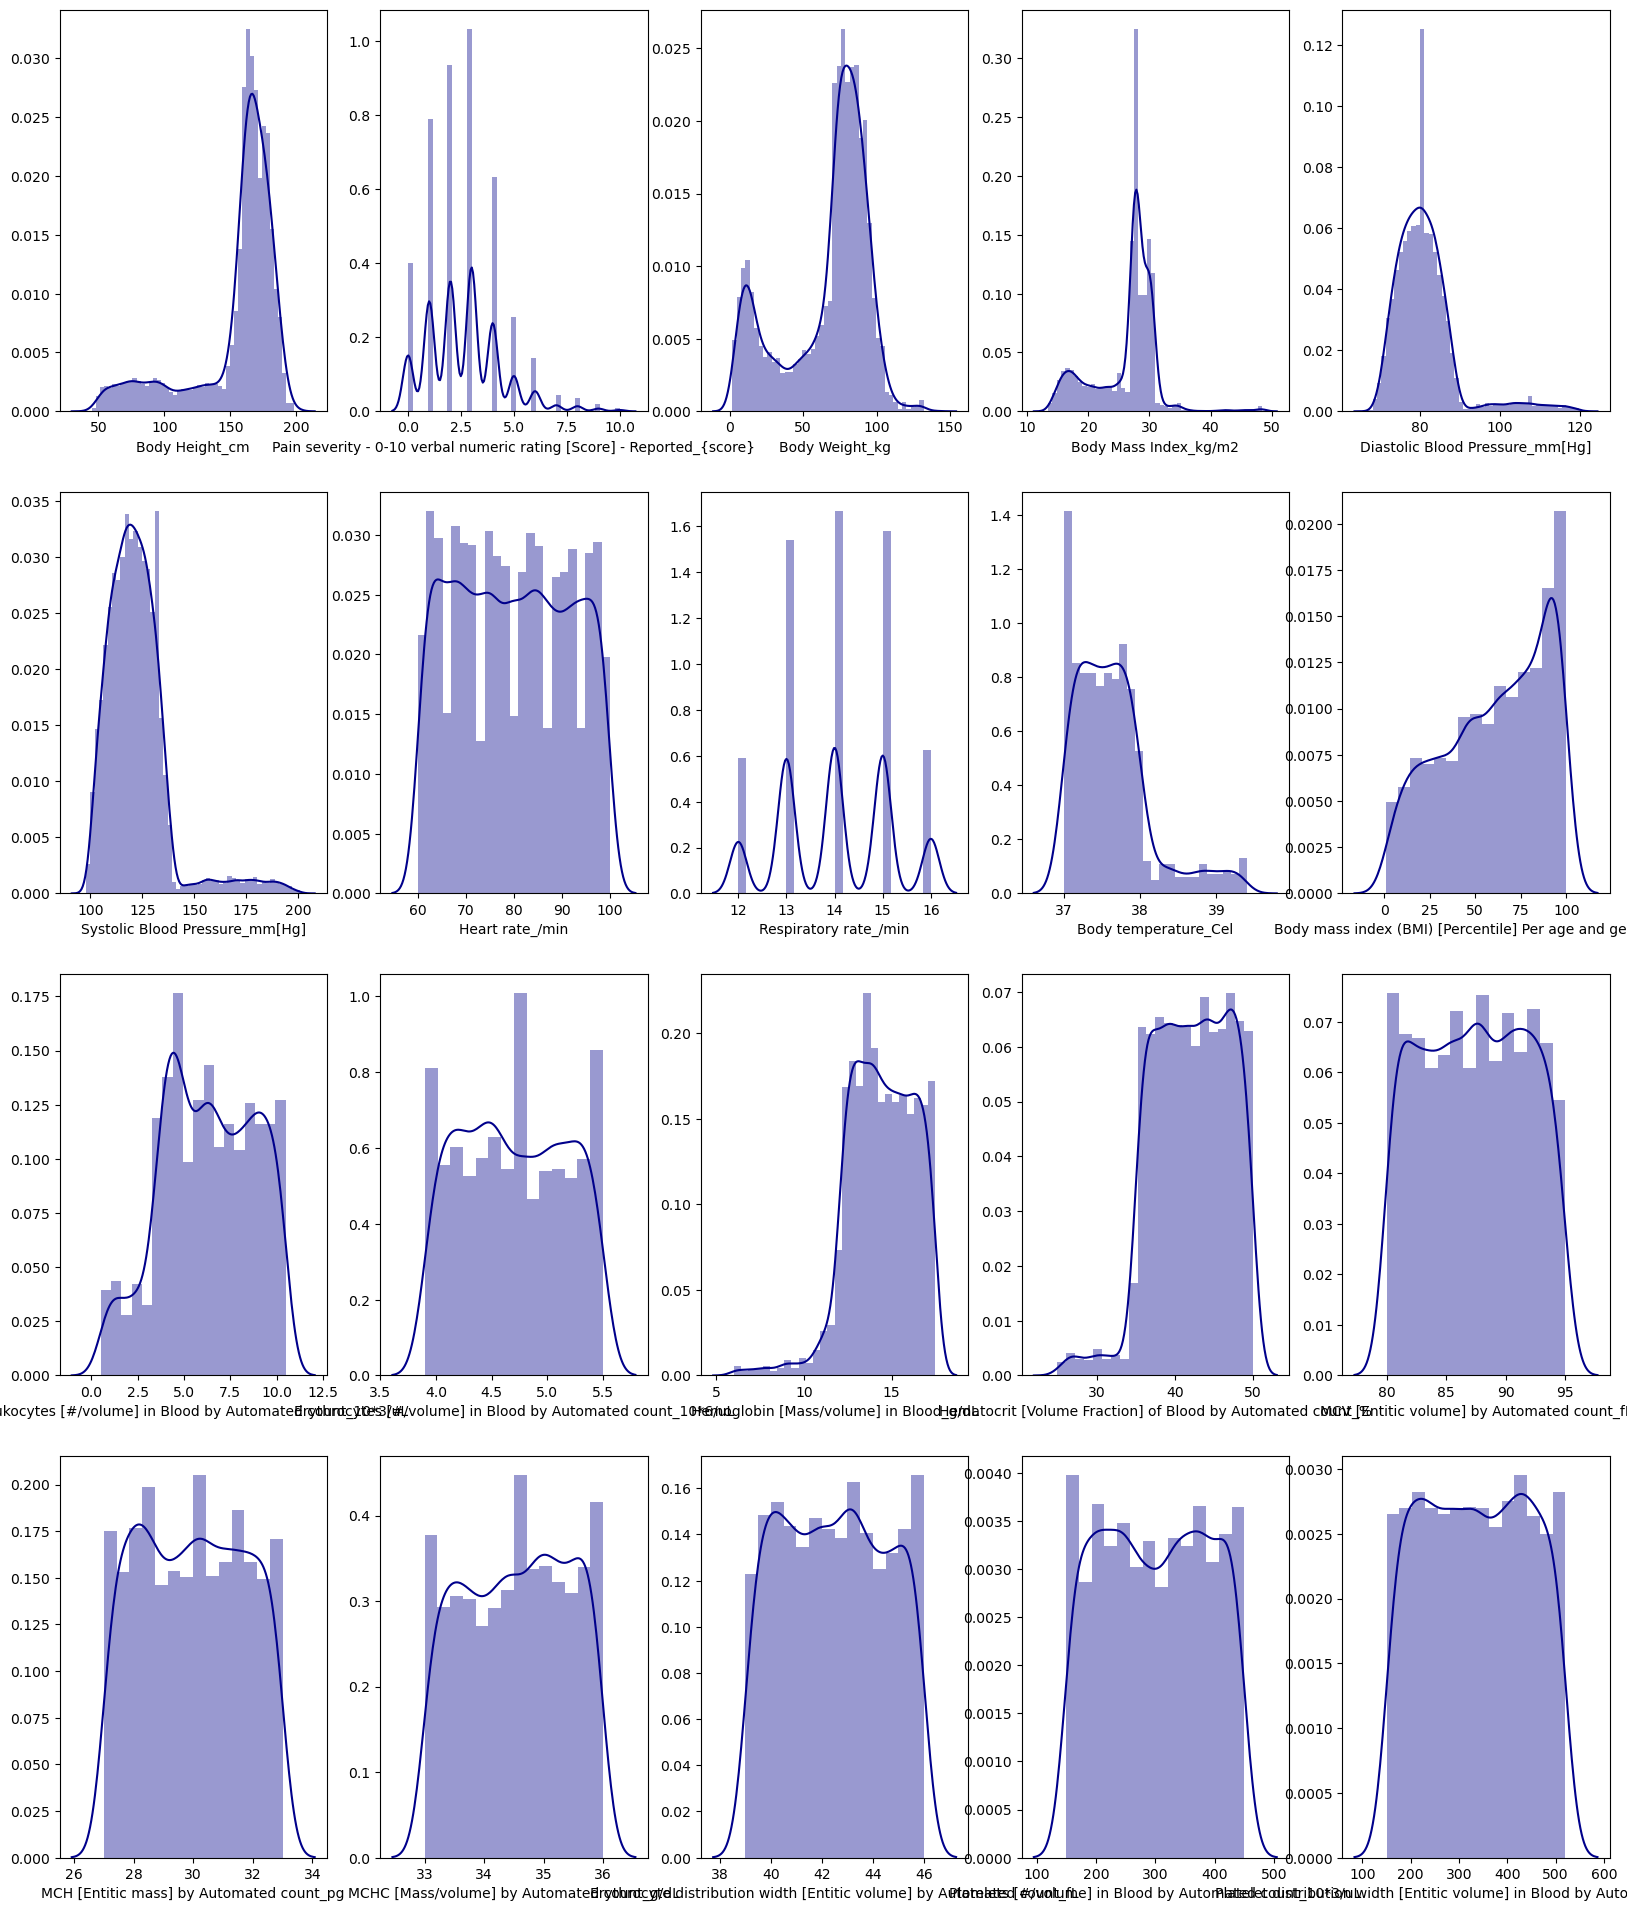

In [42]:
#data distribution for the observations, grouped by DESCRIPTION.
f, ax = plt.subplots(4, 5, figsize=(20, 24))
i = 0
for obs in num_observations["DESCRIPTION"].unique()[0:20]:
    i += 1
    plt.subplot(4, 5, i)
    selected_df = num_observations.loc[num_observations["DESCRIPTION"]==obs]
    g = sns.distplot(selected_df["VALUE"], color="darkblue")
    g.set(ylabel=None)
    g.set(xlabel=obs)

plt.show()

# View data for one patient

In [55]:
patient = num_observations["PATIENT"].value_counts().index[0]
print(patient)
obs_subset_df = num_observations.loc[num_observations["PATIENT"]==patient]

cae10920-f977-48b4-a0d3-4d70ad561fd1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

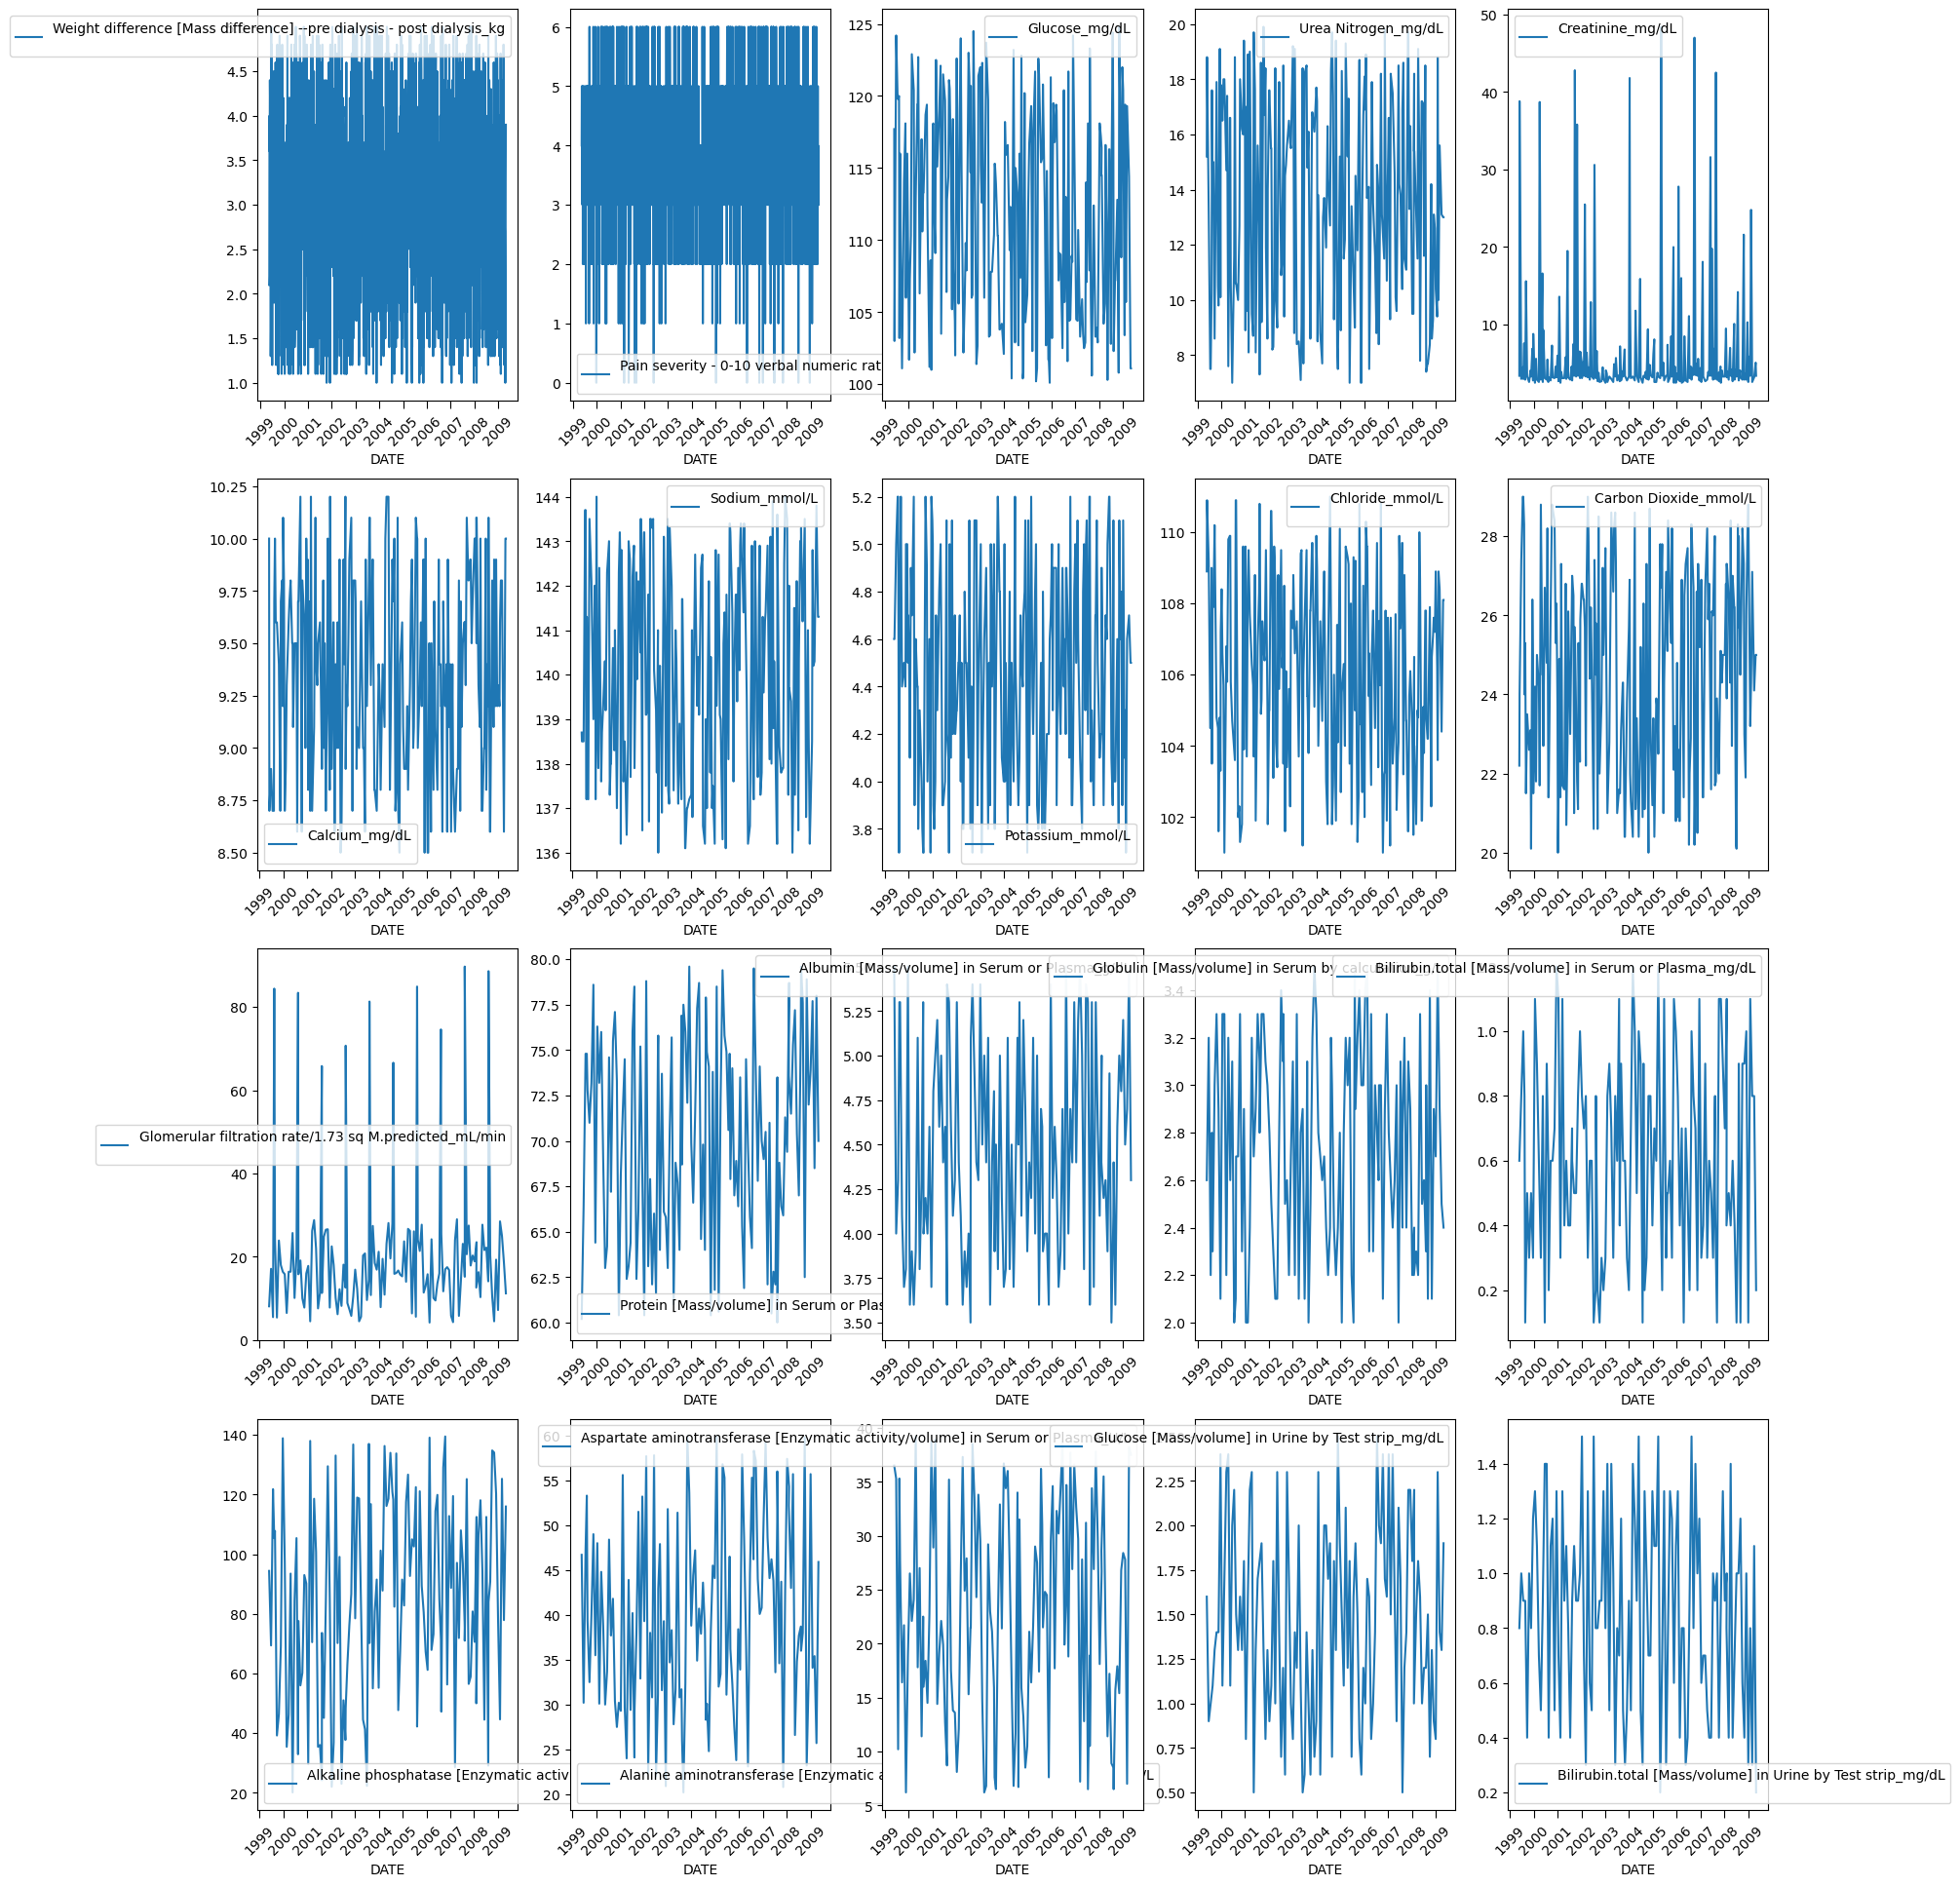

In [68]:
resource_code_display = obs_subset_df["DESCRIPTION"].unique()

f, ax = plt.subplots(4, 5, figsize=(20, 24))
i = 0
for display in resource_code_display[0:20]:
    i += 1
    plt.subplot(4, 5,i)
    plt.legend(loc=2, prop={'size': 3})
    sel_df = obs_subset_df.loc[obs_subset_df["DESCRIPTION"]==display]
    label_text = f"{display}\n"
    plt.plot(sel_df["DATE"], sel_df["VALUE"], label=label_text)
    plt.tick_params(axis='x', rotation=45, size=6)
    plt.xlabel("DATE")
    plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

Selected patient: 19d2cfb8-439b-454a-b47e-5274c219005b


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


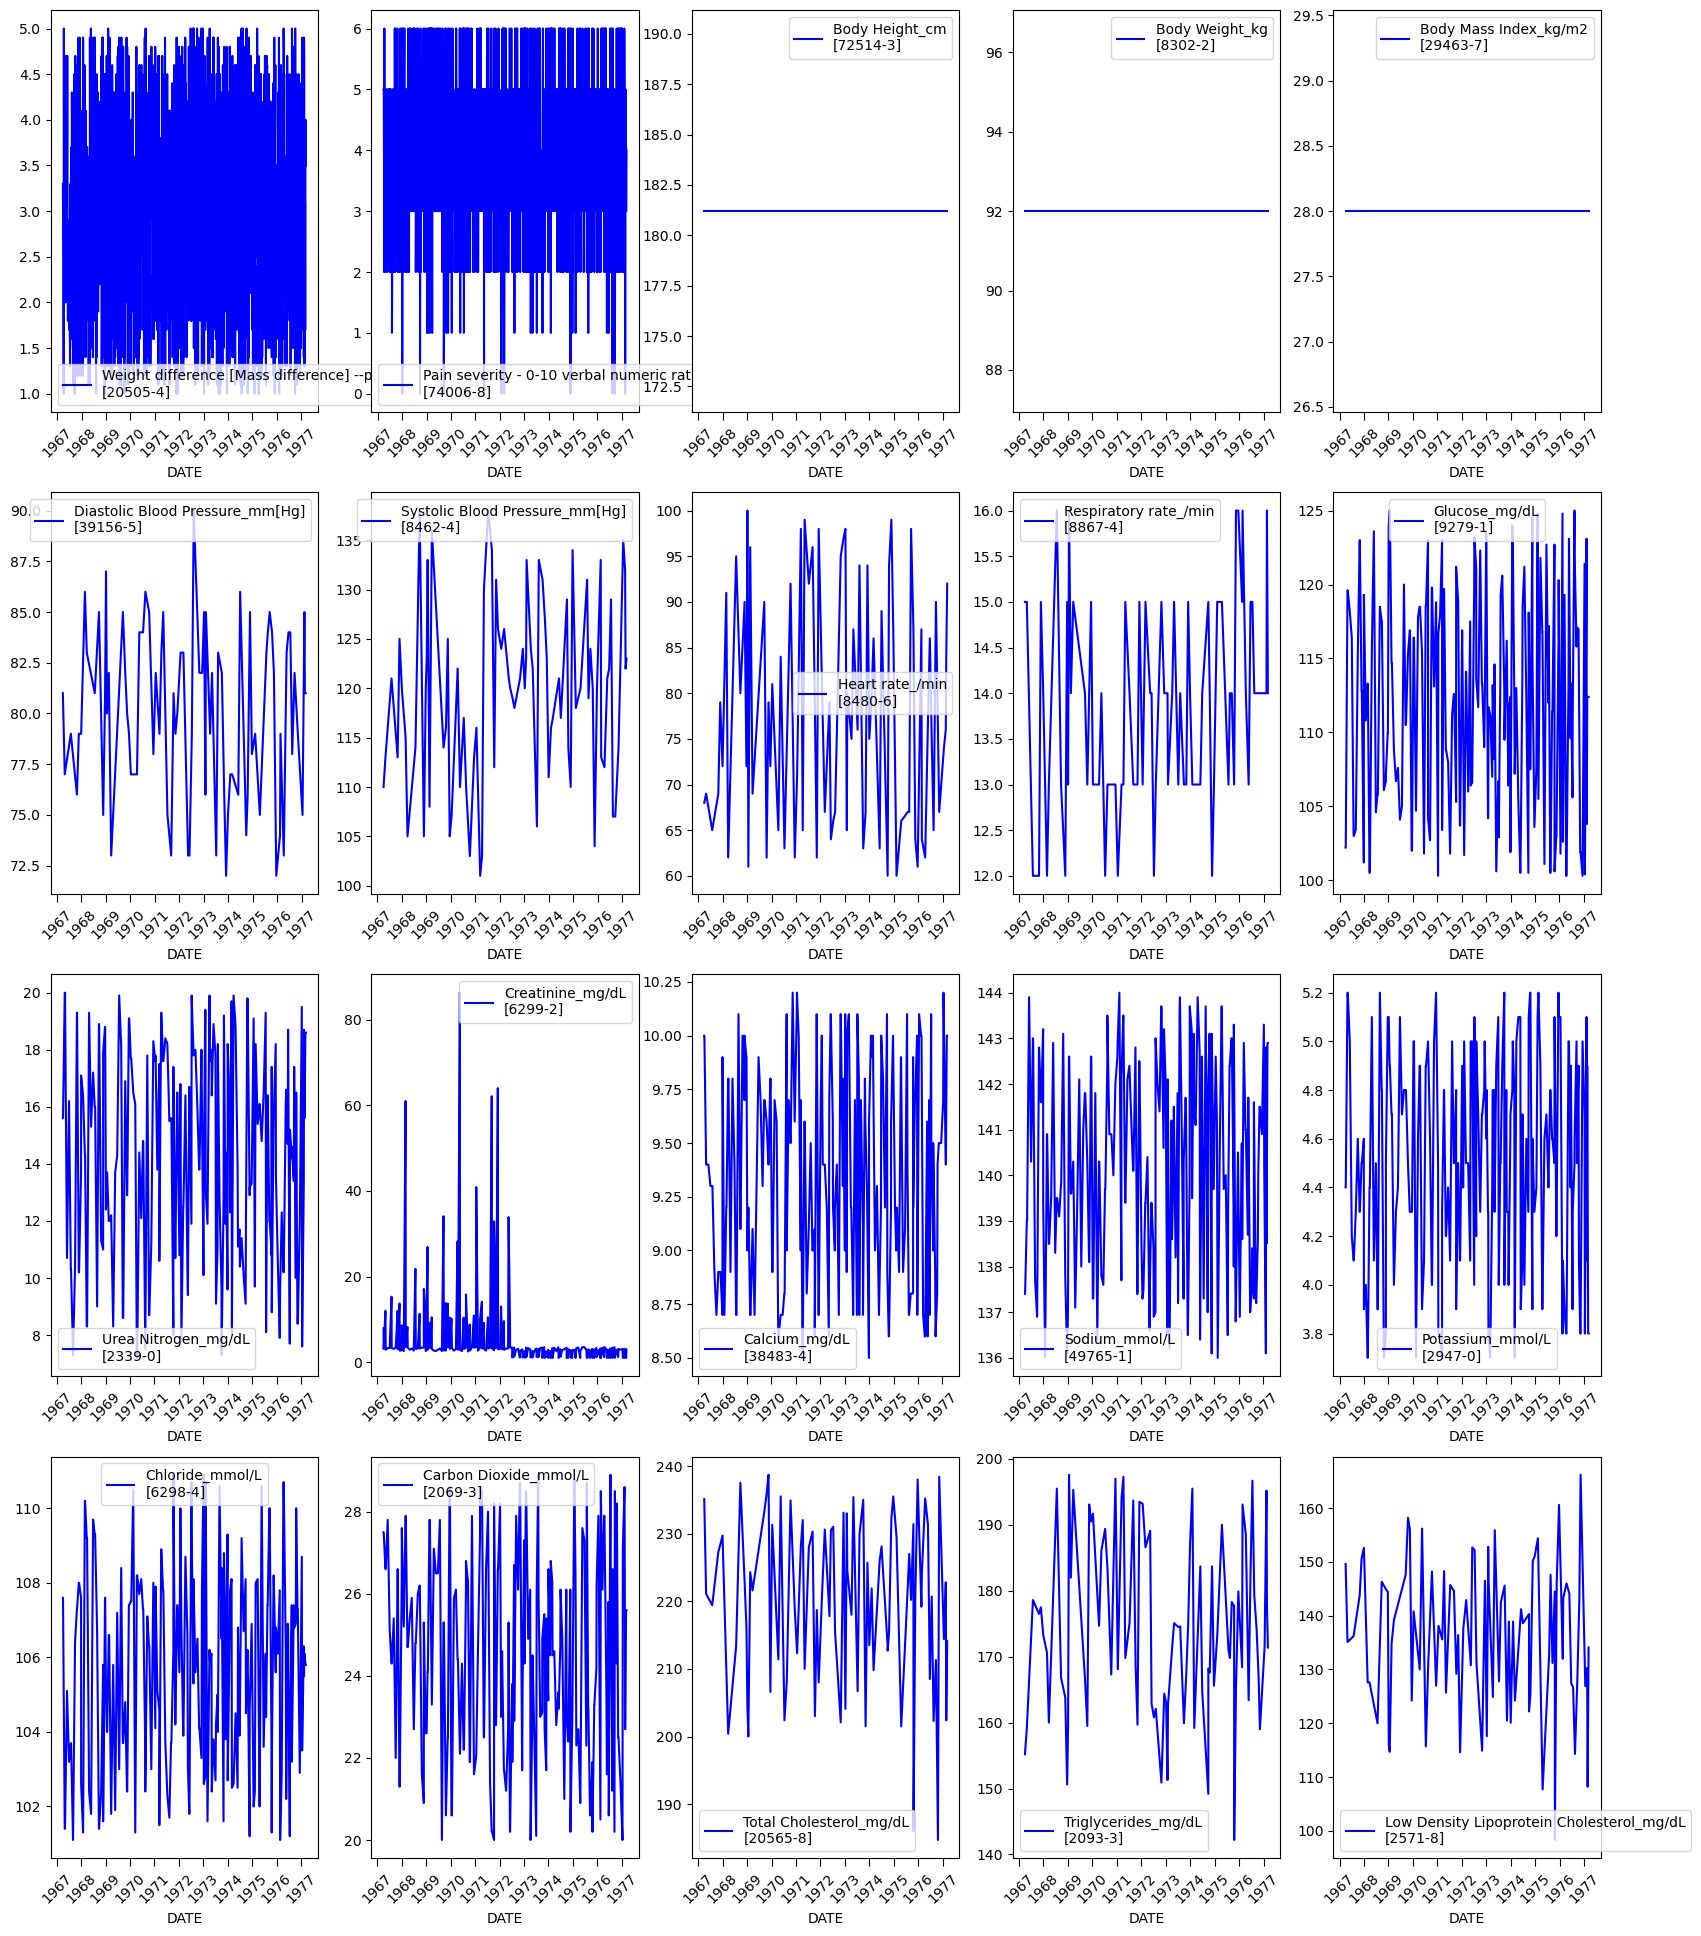

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

Selected patient: 3f336702-bf73-4fc8-bd59-3ba77fd65d0d


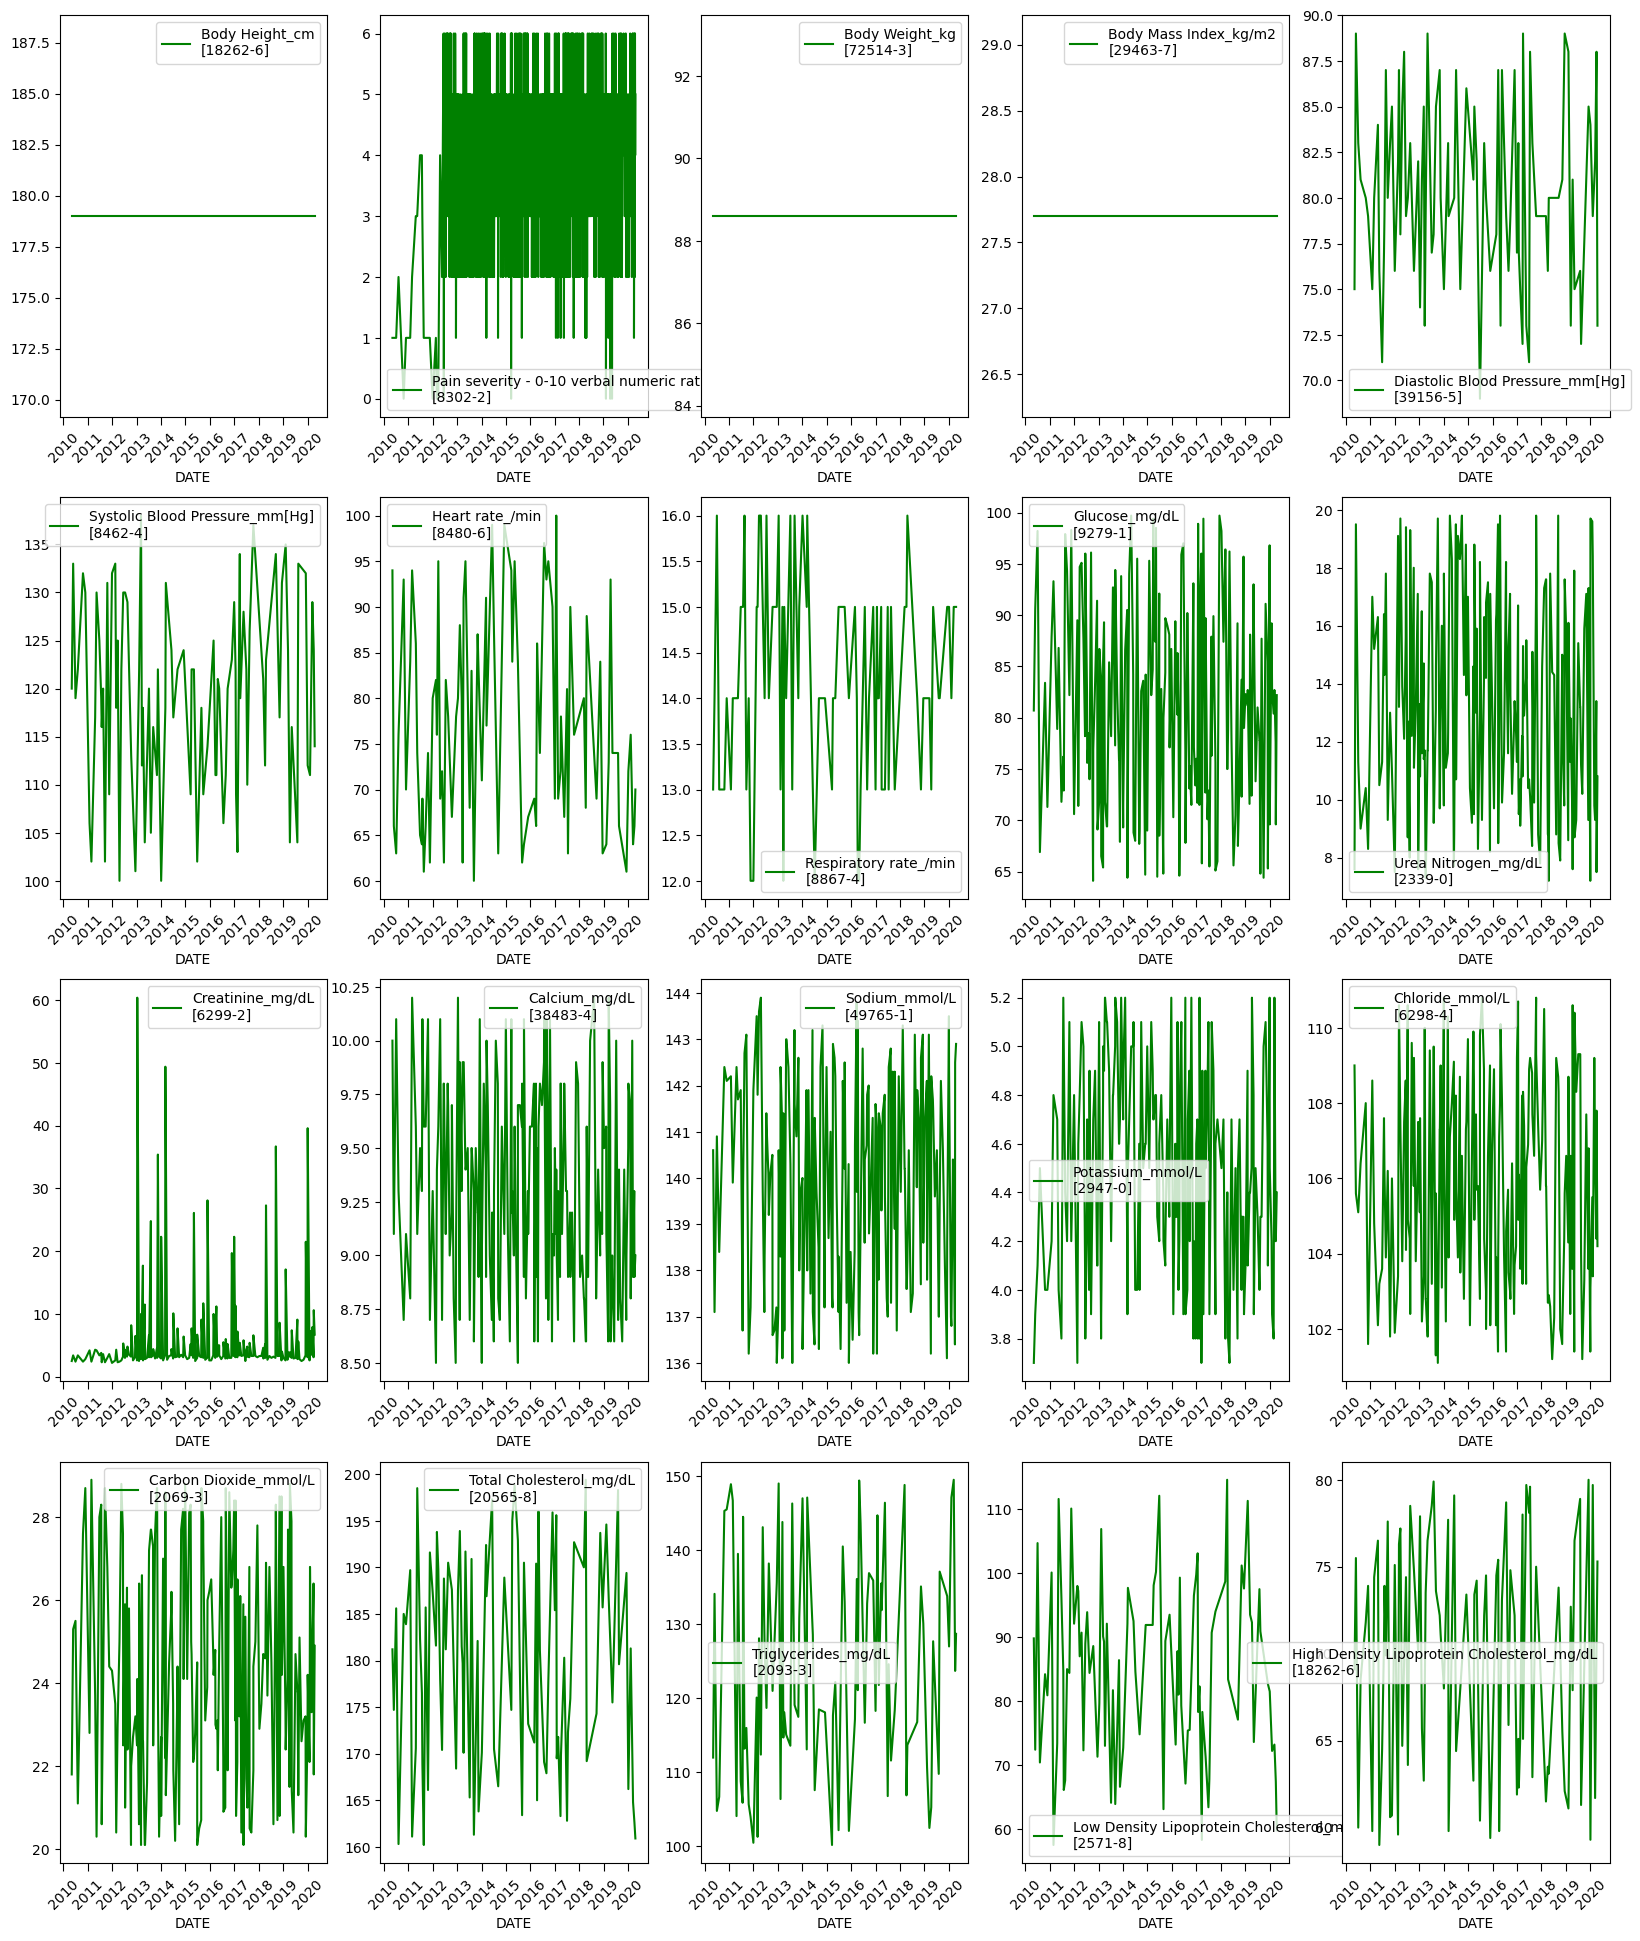

Selected patient: 59cf17d9-6c13-4333-a1cb-cc5fdf63366d


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

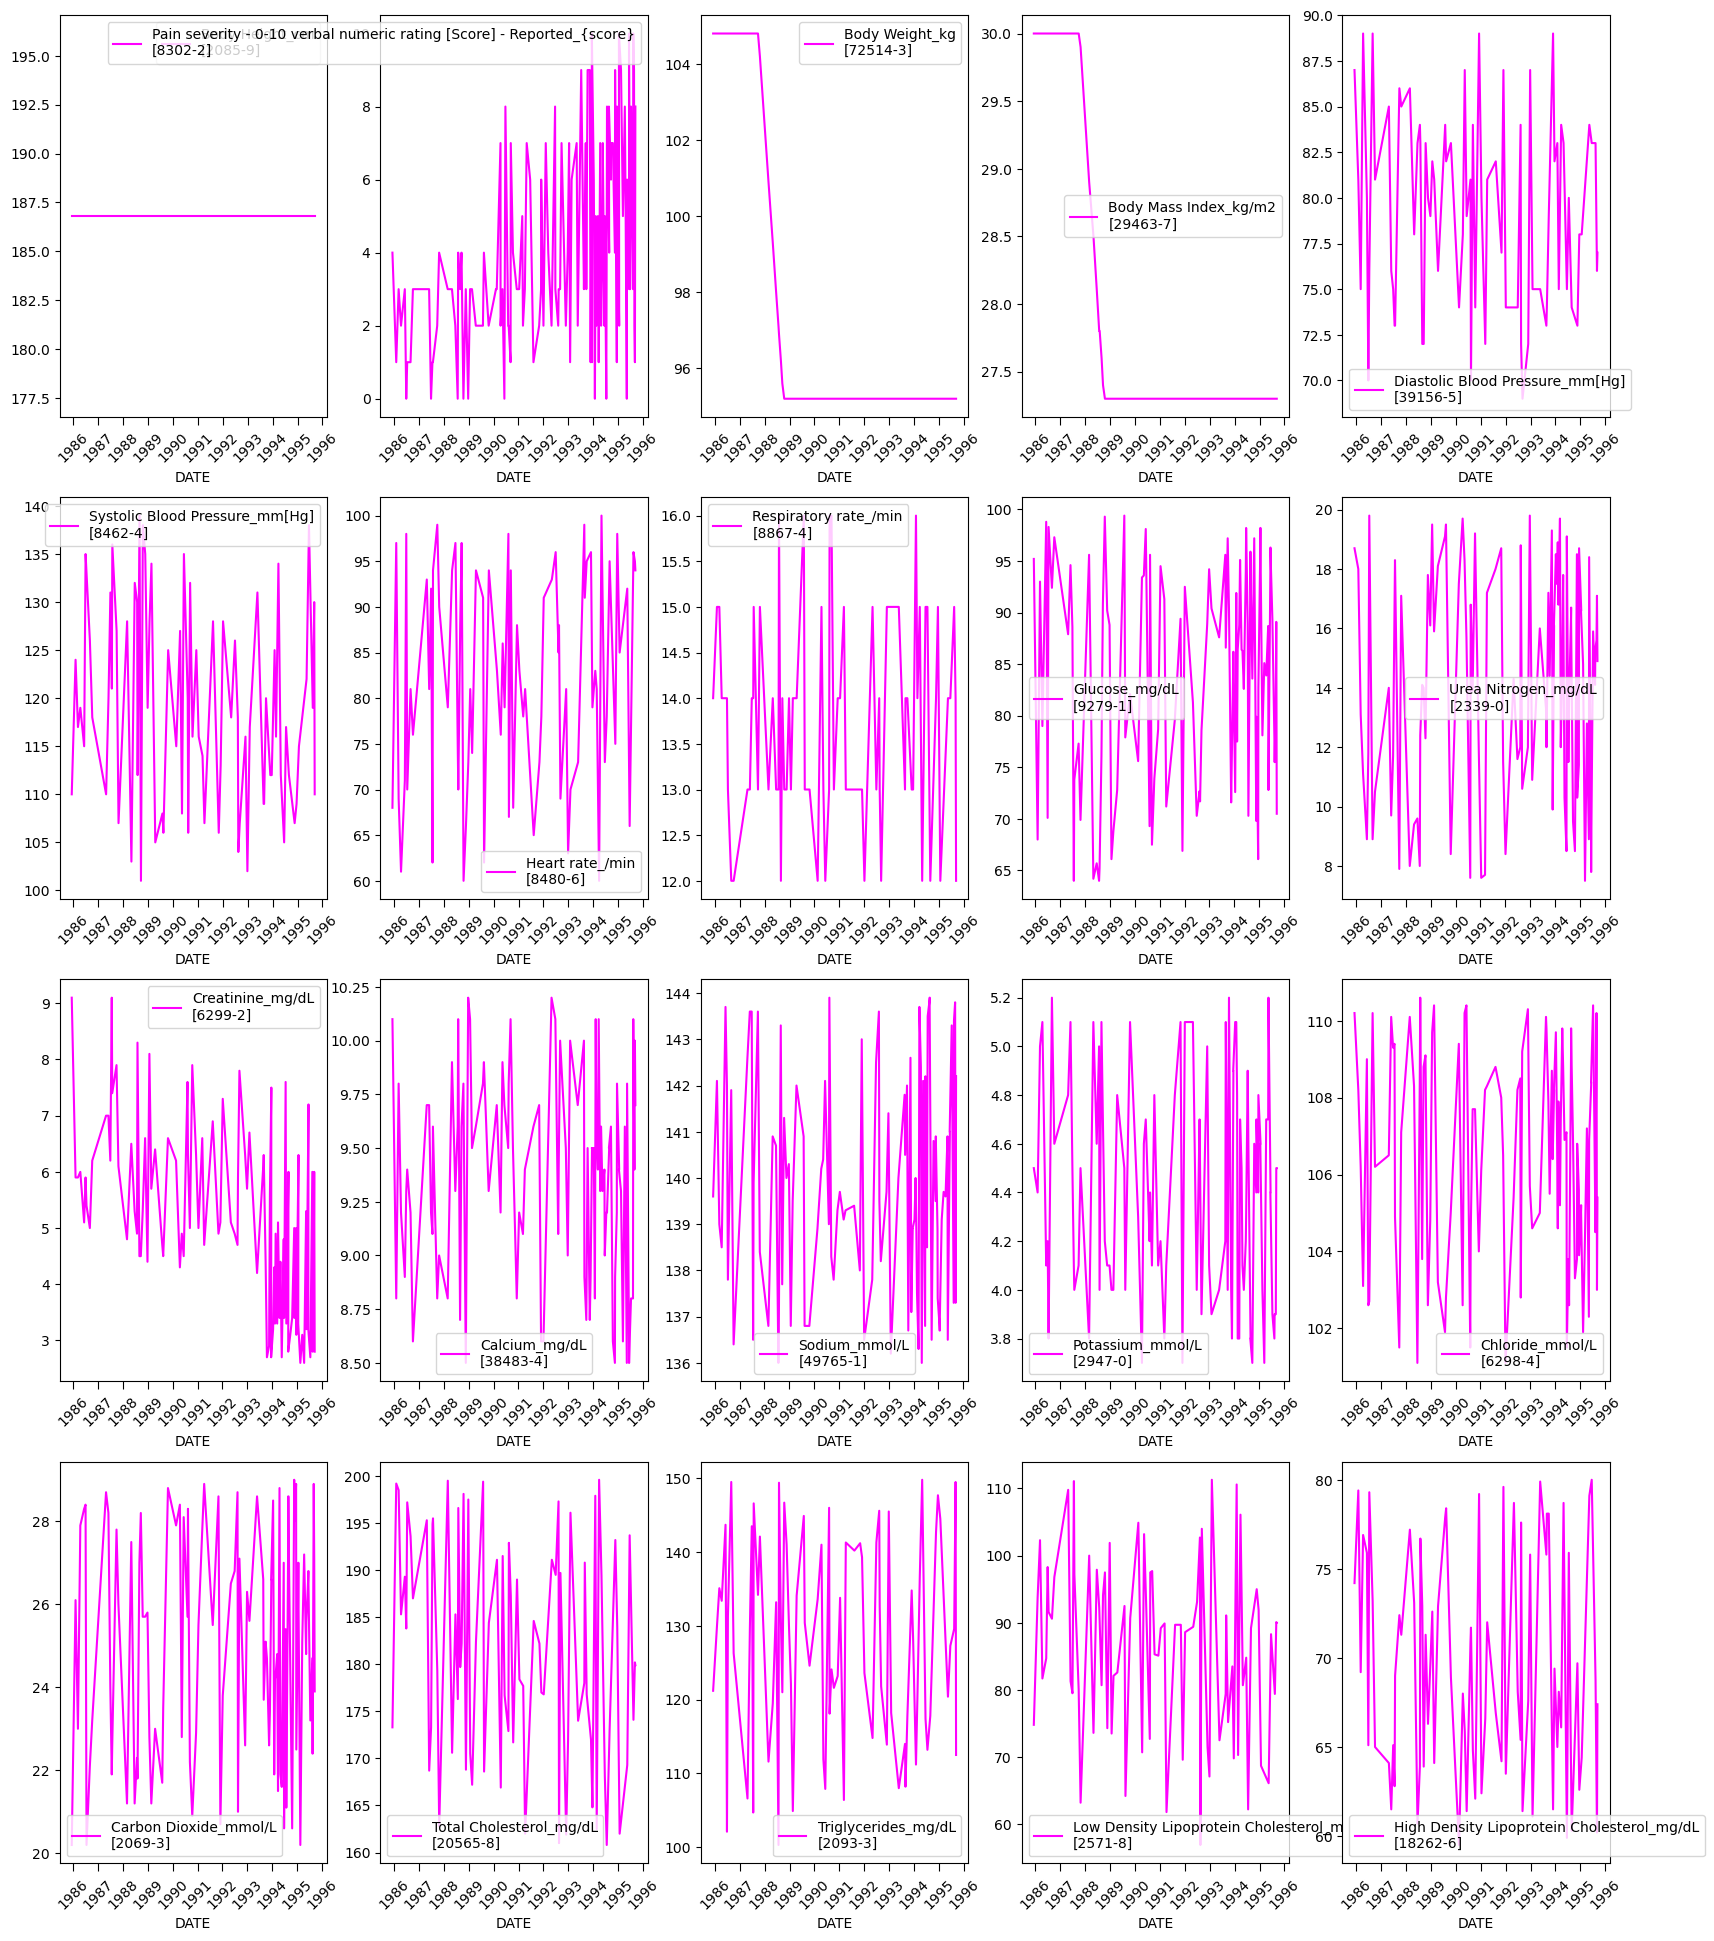

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

Selected patient: 3acf9313-1874-4dff-ab2a-3187516d92d6


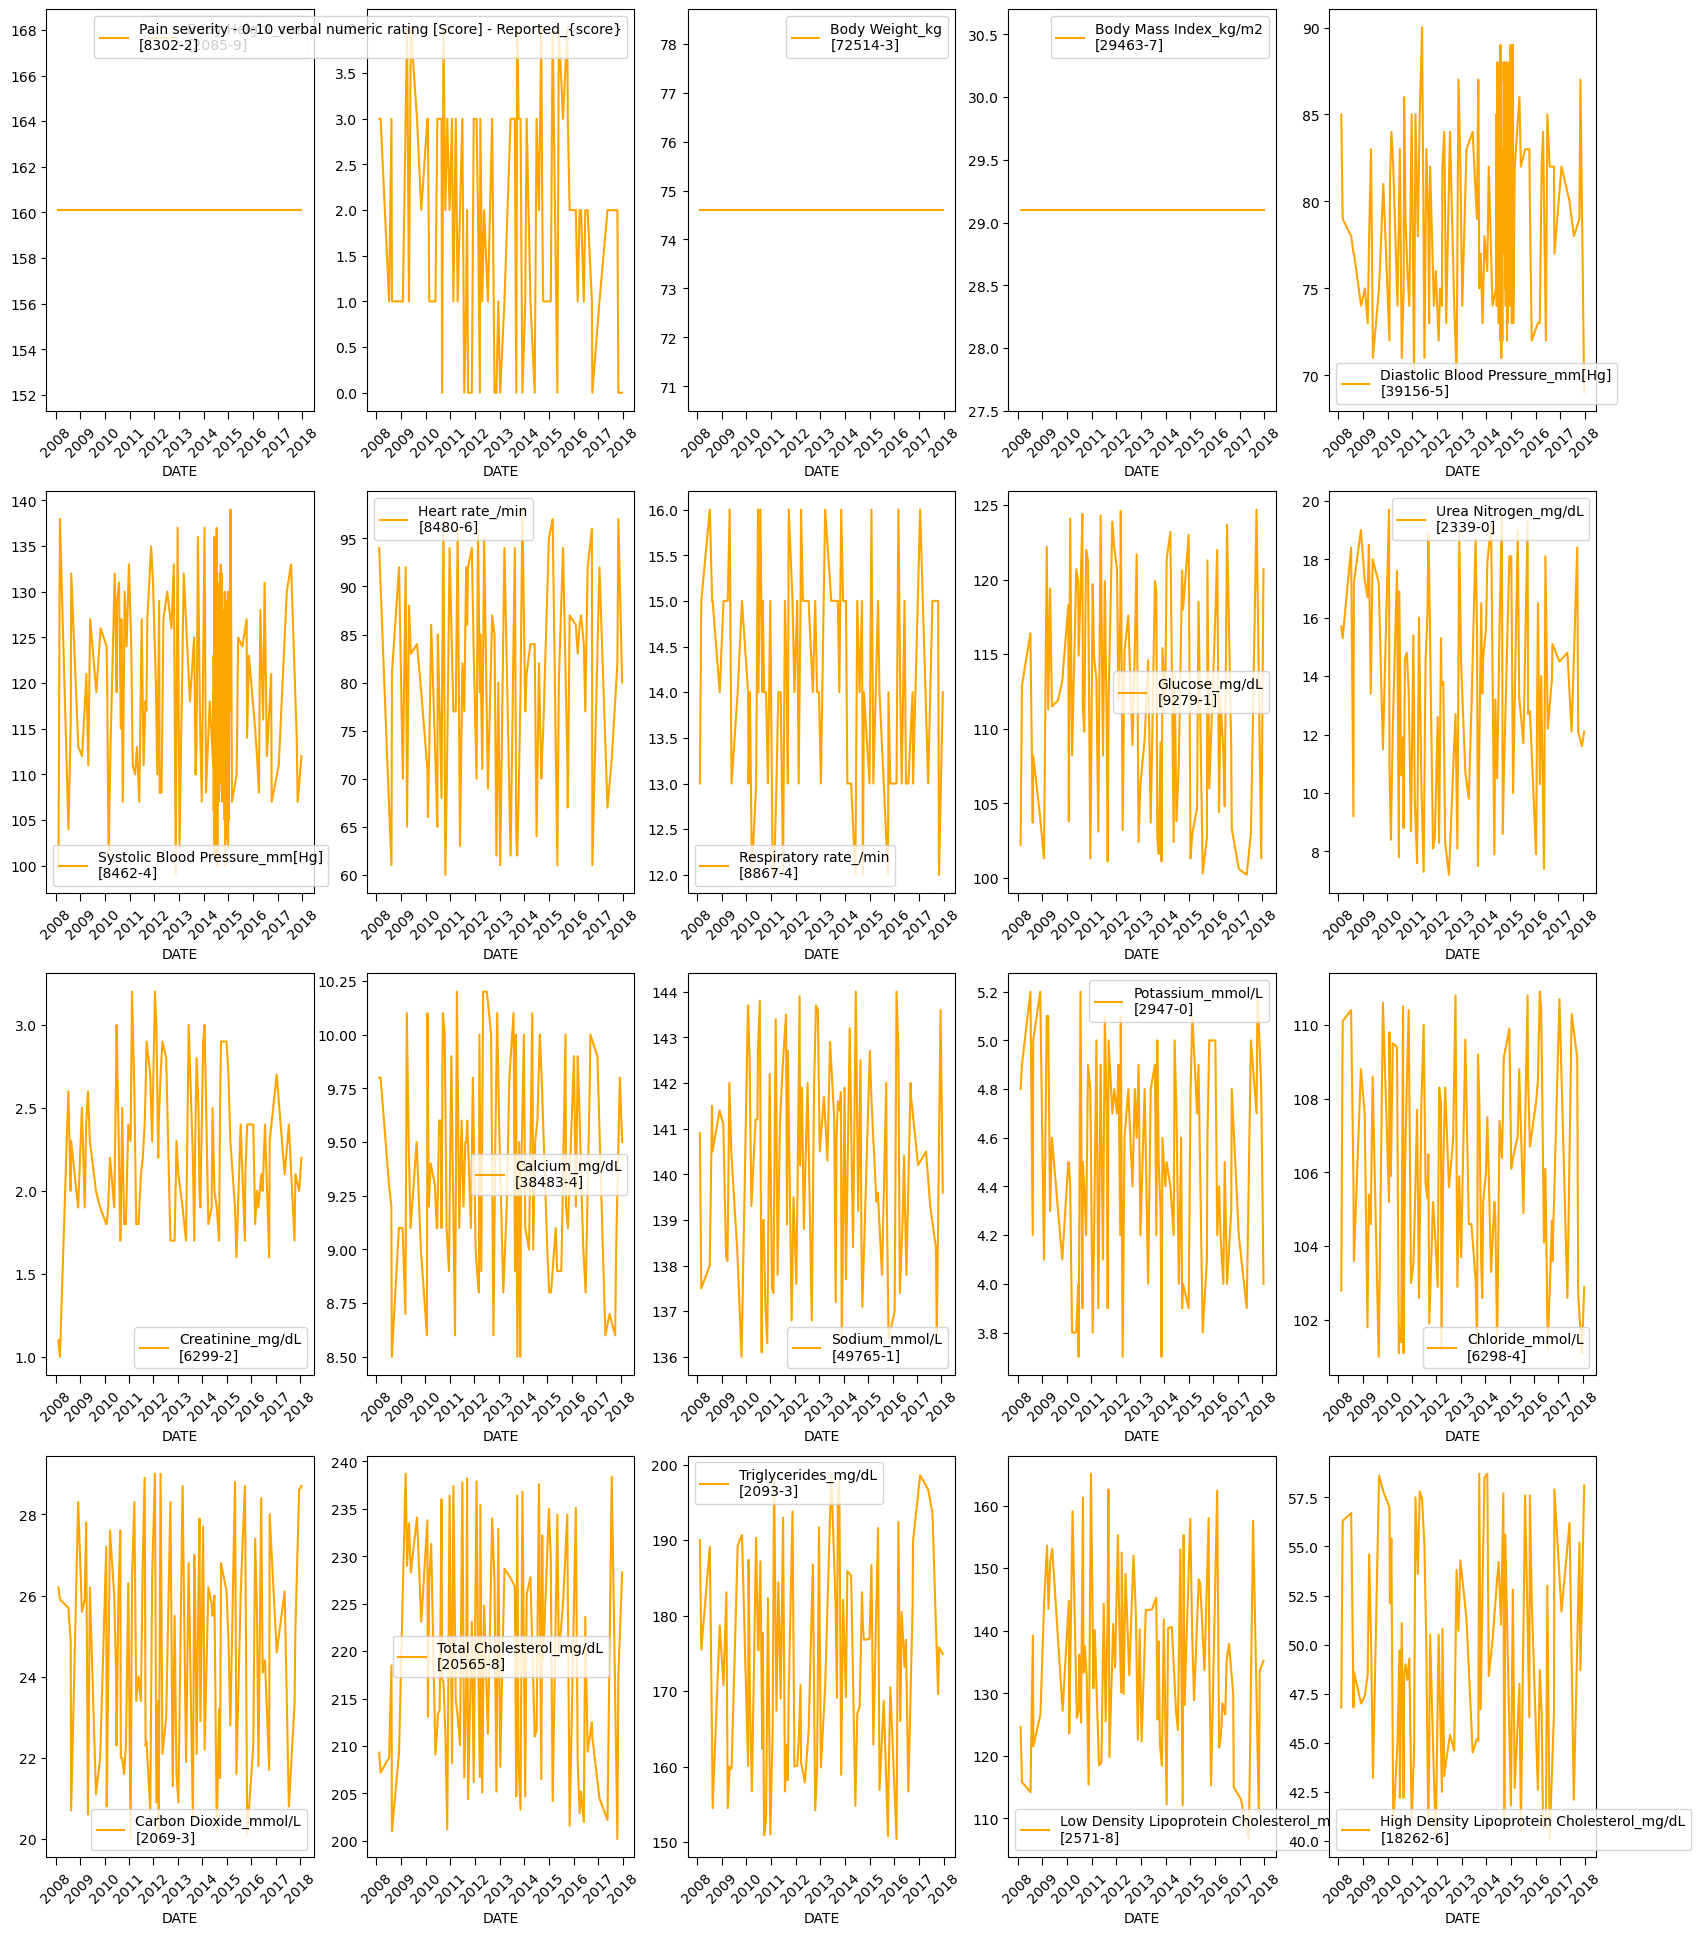

In [70]:
for idx in range(1, 5):
    patient = num_observations["PATIENT"].value_counts().index[idx]
    print(f"Selected patient: {patient}")
    obs_subset_df = num_observations.loc[num_observations["PATIENT"]==patient]
    colors = ["red", "blue", "green", "magenta", "orange"]
    f, ax = plt.subplots(4, 5, figsize=(20, 24))
    i = 0
    for obs in obs_subset_df["DESCRIPTION"].unique()[0:20]:
        i += 1
        plt.subplot(4, 5,i)
        plt.legend(loc=2, prop={'size': 3})
        label_text = f"{obs}\n[{sel_df['CODE'].values[0]}]"
        sel_df = obs_subset_df.loc[obs_subset_df["DESCRIPTION"]==obs]
        plt.plot(sel_df["DATE"], sel_df["VALUE"], label=label_text, color=colors[idx])
        plt.tick_params(axis='x', rotation=45, size=6)
        plt.xlabel("DATE")
        plt.legend()
    plt.show()

In [203]:
#convert to wide table
#num_observations = pd.pivot_table(num_observations, index=['DATE', 'PATIENT', 'ENCOUNTER'],columns='DESCRIPTION',values='VALUE')

#num_observations

In [204]:
# one-hot-encode cat_observations

#cat_observations = pd.get_dummies(cat_observations, columns = ['VALUE'])
#cat_observations

In [205]:
#Join dfs
dfList = [num_observations, cat_observations, procedures_df, medications_df, conditions_df]

In [206]:
from functools import reduce
reduce(lambda x, y: pd.merge(x, y, on = ['DATE', 'PATIENT', 'ENCOUNTER'], outer), dfList)

SyntaxError: positional argument follows keyword argument (646110832.py, line 2)

In [ ]:
len(cat_observations['PATIENT'].unique())

In [207]:
num_observations['VALUE'].value_counts()

1.0       11382
0.0        6148
3.0        4752
2.0        4112
14.0       3748
          ...  
423.1         1
358.6         1
323.0         1
1661.3        1
931.7         1
Name: VALUE, Length: 4758, dtype: int64

In [182]:
num_observations

DESCRIPTION                                                                                          Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma_U/L  \
DATE                      PATIENT                              ENCOUNTER                                                                                                           
1916-05-05 23:35:03+00:00 67156a1d-2e86-42e0-a81c-6ce3af24aca4 8fabe01e-fbda-496d-8bb2-7e426070814c                                                NaN                             
1916-11-03 23:35:03+00:00 67156a1d-2e86-42e0-a81c-6ce3af24aca4 7ad88525-8907-4136-b8fa-22cb9f2ba273                                                NaN                             
1917-05-04 23:35:03+00:00 67156a1d-2e86-42e0-a81c-6ce3af24aca4 87f5a1b7-852e-47a5-98f8-10c325710040                                                NaN                             
1918-05-10 23:35:03+00:00 67156a1d-2e86-42e0-a81c-6ce3af24aca4 d9996c76-2dd7-4d15-b873-4d5491e66f85                                                NaN                             
1919-05-16 23:35:03+00:00 67156a1d-2e86-42e0-a81c-6ce3af24aca4 f6f7a3b8-d2b1-433e-bc59-4c1a391b95d3                                                NaN                             
...                                                                                                                                                ...                             
2020-04-26 22:11:09+00:00 d3f08bb8-e79f-4529-a37a-8aebdfbffe6a dab9a177-ef4f-4d7f-bc67-53f69e991f35                                                NaN                             
2020-04-26 22:57:51+00:00 cb7b125f-b586-4ed2-9d0c-77f449f39d8b 7333c072-8784-4b41-96ce-6c2d2635ede7                                                NaN                             
2020-04-27 18:42:35+00:00 6e20fc08-a75d-43db-b642-4f15064aeb0d 6ed93823-04e6-414a-9afa-373d3c247b14                                                NaN                             
2020-04-27 23:46:02+00:00 d0355c37-6594-4147-91ff-8b82dfb0a6c2 0fd0d1fa-b88c-42a2-9087-8eb98d84245e                                                NaN                             
2020-04-28 18:58:37+00:00 2ffe9369-24e4-414b-8973-258fad09313a b9241af9-8511-44e8-8c5b-1fde71293c0f                                                NaN                             

DESCRIPTION                                                                                          Albumin [Mass/volume] in Serum or Plasma_g/dL  \
DATE                      PATIENT                              ENCOUNTER                                                                             
1916-05-05 23:35:03+00:00 67156a1d-2e86-42e0-a81c-6ce3af24aca4 8fabe01e-fbda-496d-8bb2-7e426070814c                                            NaN   
1916-11-03 23:35:03+00:00 67156a1d-2e86-42e0-a81c-6ce3af24aca4 7ad88525-8907-4136-b8fa-22cb9f2ba273                                            NaN   
1917-05-04 23:35:03+00:00 67156a1d-2e86-42e0-a81c-6ce3af24aca4 87f5a1b7-852e-47a5-98f8-10c325710040                                            NaN   
1918-05-10 23:35:03+00:00 67156a1d-2e86-42e0-a81c-6ce3af24aca4 d9996c76-2dd7-4d15-b873-4d5491e66f85                                            NaN   
1919-05-16 23:35:03+00:00 67156a1d-2e86-42e0-a81c-6ce3af24aca4 f6f7a3b8-d2b1-433e-bc59-4c1a391b95d3                                            NaN   
...                                                                                                                                            ...   
2020-04-26 22:11:09+00:00 d3f08bb8-e79f-4529-a37a-8aebdfbffe6a dab9a177-ef4f-4d7f-bc67-53f69e991f35                                            NaN   
2020-04-26 22:57:51+00:00 cb7b125f-b586-4ed2-9d0c-77f449f39d8b 7333c072-8784-4b41-96ce-6c2d2635ede7                                            NaN   
2020-04-27 18:42:35+00:00 6e20fc08-a75d-43db-b642-4f15064aeb0d 6ed93823-04e6-414a-9afa-373d3c247b14                                            NaN   
2020-04-2